# Credit Card Fraud Detection using PyCaret

#### In this project we will be making predictions using Machine Learning Techniques, and Auto ML Technique to detect credit card fraud. Importantly, we'll be using PyCaret and balanced sampling. 

## Context 
#### Credit card fraud happens even with the current level of security inplace. This project aims to detect these fraudulent credit card activities based on transaction patterns so that such transactions are flagged and necessary mitigating factors are initiated to stop the transactions. By flagging these transactions, customers are not charged for items that they did not purchase.

## Dataset

### Source
 - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Overview
##### The dataset contains transactions made by credit cards in September 2013 by European cardholders.

##### This dataset presents transactions that occurred within two days. We have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced.

##### This dataset contains only numerical input variables which are the result of a PCA transformation, 'Time', and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, plot_roc_curve


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn import svm, datasets, preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

### Importing Libraries for Outlier Detection

### Read in the dataset

In [3]:
data = pd.read_csv('creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()[['Time','Amount','Class']] # Leaving out the PCA

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


##### Correlation plot for 5000 data samples highlighting relationship between the 3 non PCA features and all the columns with extra focus on the target 'Class'.

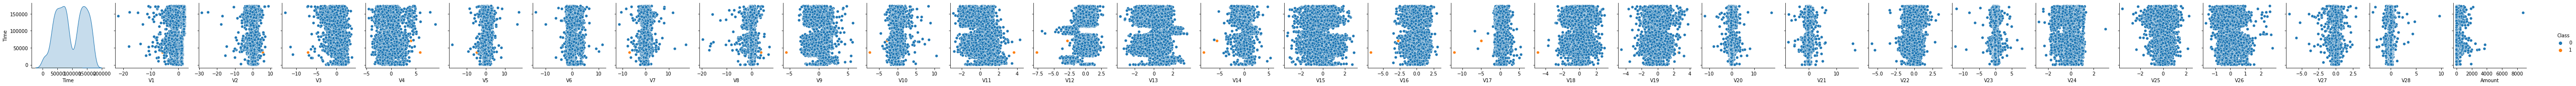

In [ ]:
sns.pairplot(df.sample(5000),hue="Class", y_vars="Time")

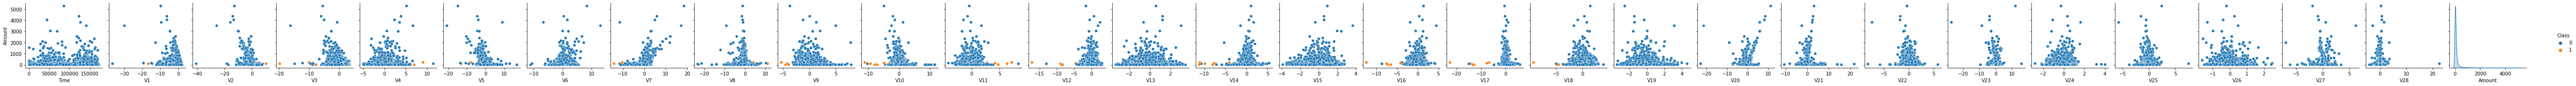

In [ ]:
sns.pairplot(df.sample(5000),hue="Class", y_vars="Amount")

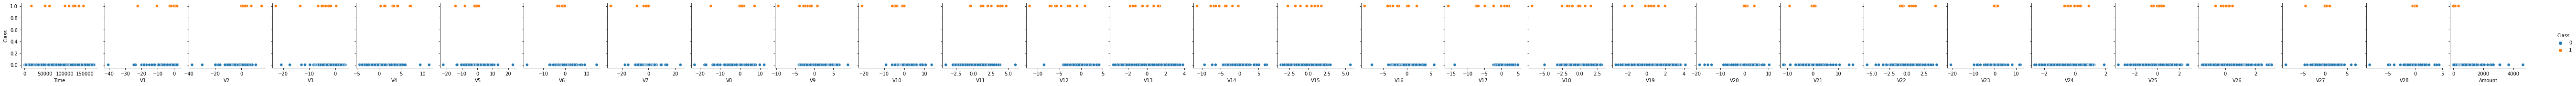

In [ ]:
sns.pairplot(df.sample(5000),hue="Class", y_vars="Class")

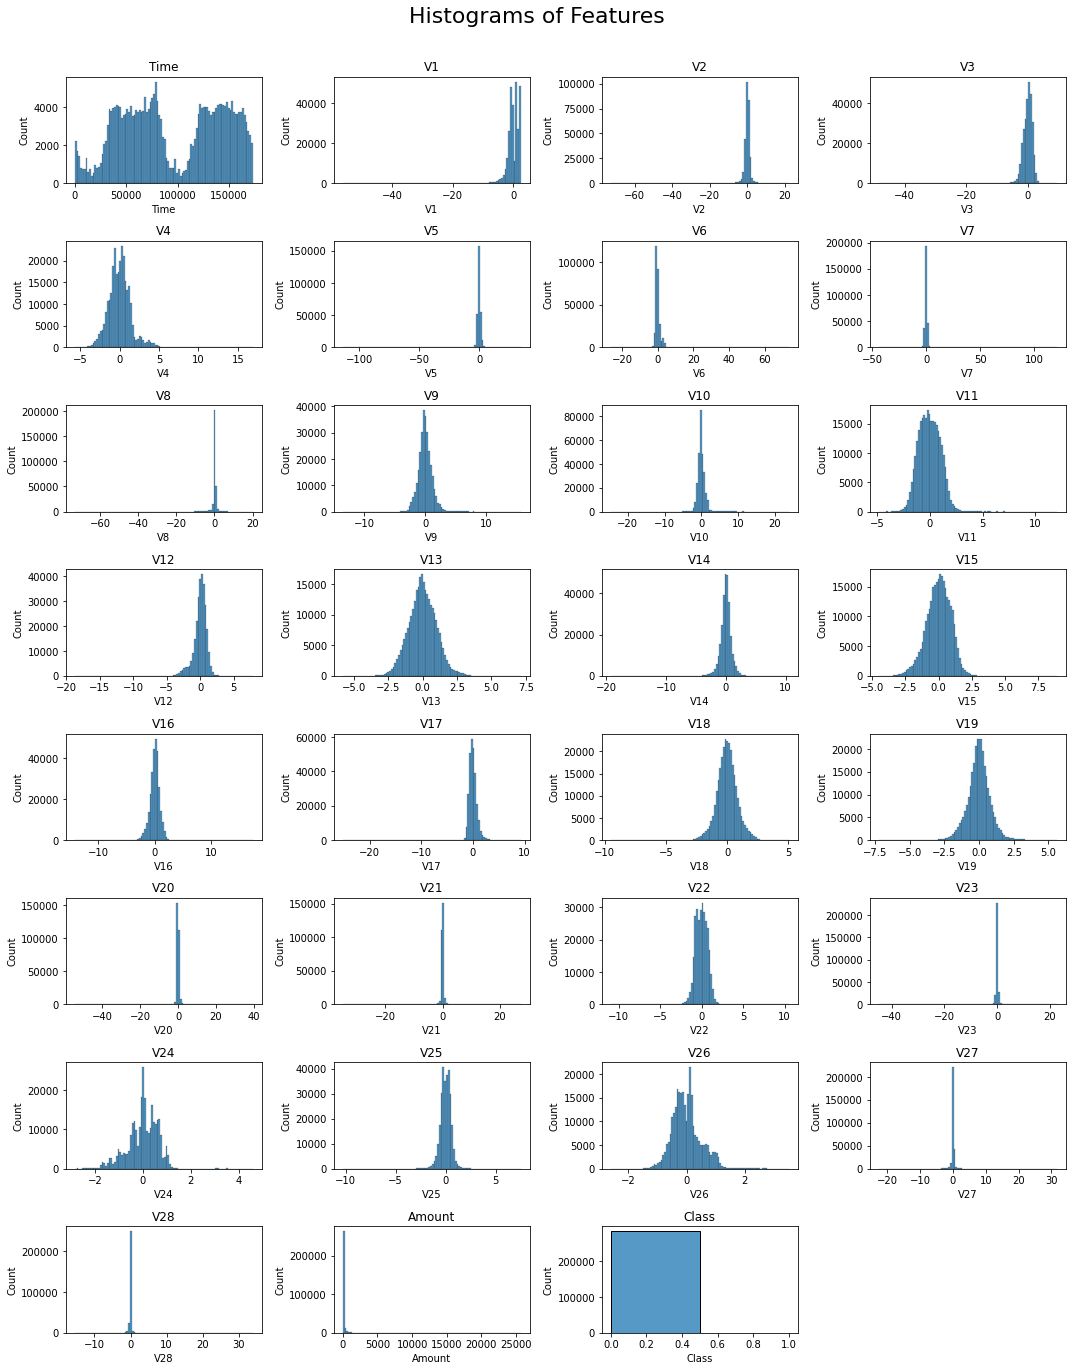

In [ ]:
## Histogram plot of all the Features
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histogram of Features', fontsize=22)

for i in range(df.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])
    vals = np.size(df.iloc[:, i].unique())
    
    # Setting the maximum bin size
    if vals >= 100:
        vals = 100                                  
    
    sns.histplot(df.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Checking the distribution of Normal and Fraud cases in our Data Set

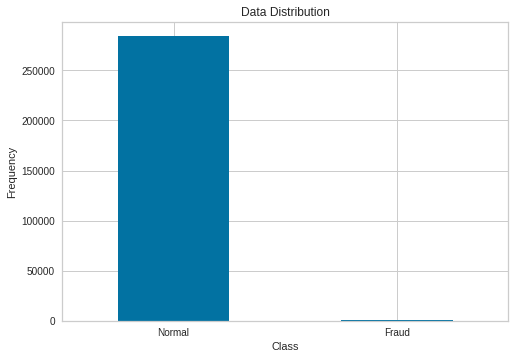

,0
Normal,284315
Fraud,492


In [ ]:
fraud_dist = pd.value_counts(df['Class'], sort = True)
fraud_dist.plot(kind = 'bar', rot=0)
plt.title("Data Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
## Defining labels to replace 0 and 1 value with 'Normal' and 'Fraud', respectively
labels= ['Normal','Fraud']
plt.xticks(range(2), labels)
plt.show()
fraud_dist=pd.DataFrame(np.array(fraud_dist), index=labels)
fraud_dist

#### Finding out the avg amount in both classes of the datasets

In [ ]:
fraud_trans = df[df['Class']==1]
normal_trans = df[df['Class']==0]

In [ ]:
fraud_trans['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal_trans['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

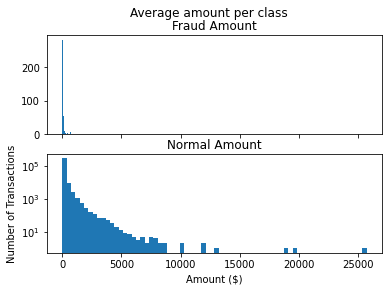

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Transaction Amount distribution per class')
bins = 70

plot1.hist(fraud_trans['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_trans['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

## Pre-processing

#### First, to reduce redundancy in data distribution, transaction amounts larger than 5000 is excluded from further study

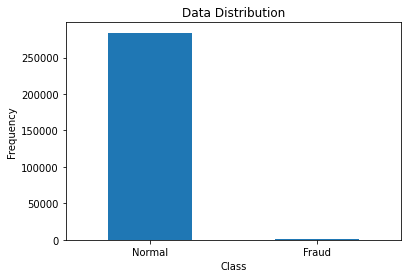

,0
Normal,284192
Fraud,492


In [4]:
df2 = df[df['Amount']<4000]
fraud_dist = pd.value_counts(df2['Class'], sort = True)
fraud_dist.plot(kind = 'bar', rot=0)
plt.title("Data Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
## Defining labels to replace 0 and 1 value with 'Normal' and 'Fraud', respectively
labels= ['Normal','Fraud']
plt.xticks(range(2), labels)
plt.show()
fraud_dist=pd.DataFrame(np.array(fraud_dist), index=labels)
fraud_dist

##### Creating our Dependent and Independent Features

In [9]:
train_df = df2.drop(columns = ['Class'])   # drop target column
target_df = df2['Class']   

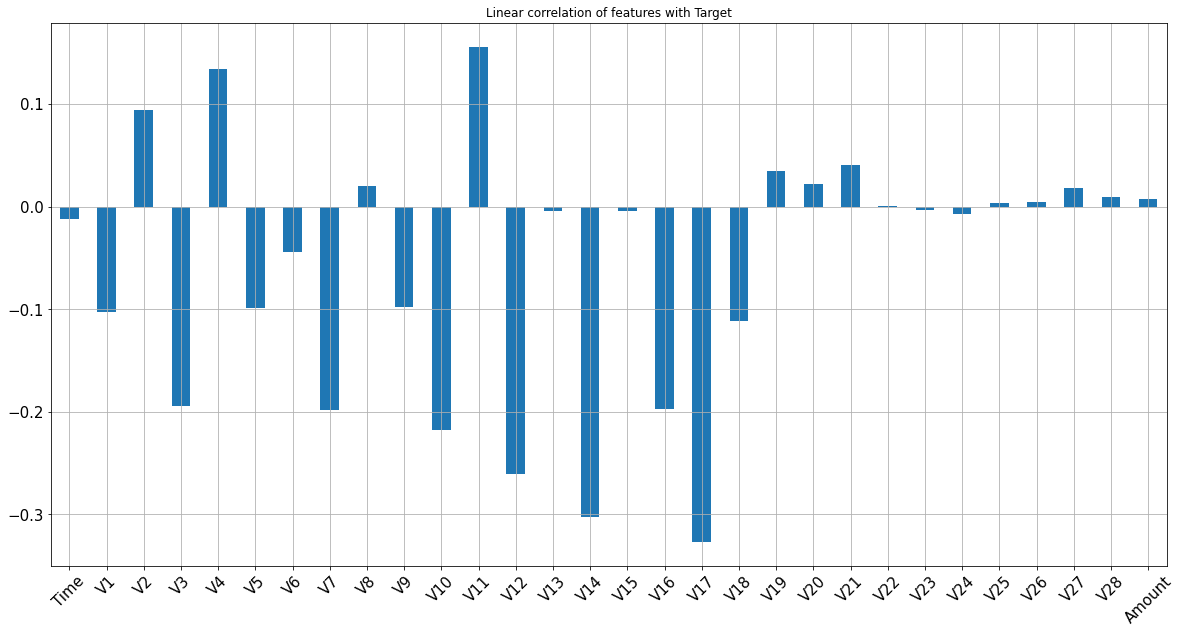

In [ ]:
## Class Correlation with Taret Variable
train_df.corrwith(df2.Class).plot.bar(
        figsize = (20, 10), title = "Linear correlation of features with Target", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [10]:
# Scaling the Amount column
train_df['normAmount'] = StandardScaler().fit_transform(train_df['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
train_scaled = train_df.drop(['Time','Amount'],axis=1)

In [ ]:
train_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.303567
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.395864
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.393867
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.179228
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.075496


In [ ]:
target_df.head() ## Dependent Variable

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Model building

### Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_scaled, target_df, test_size=0.30, random_state=42)

### We wil be using the following Models:
- Random Forest
- Isolation Forest
- Neural Network

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest.fit(x_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(x_test)
random_forest.score(x_test,y_test)

0.9995550663887783

Test Data Accuracy: 0.9996
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85244
       Fraud       0.93      0.83      0.88       162

    accuracy                           1.00     85406
   macro avg       0.97      0.91      0.94     85406
weighted avg       1.00      1.00      1.00     85406



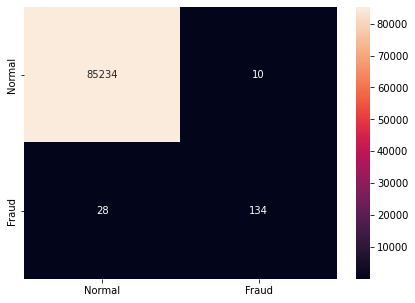

In [ ]:
## classification_report & Confusion Matrix 
labels= ['Normal','Fraud']
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('Normal','Fraud'), columns = ('Normal','Fraud'))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % random_forest.score(x_test,y_test))
print(classification_report(y_test, y_pred, target_names=labels))

## Isolation Forest

In [ ]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)                        

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=199278, random_state=0)

In [ ]:
ypred= iso_forest.predict(x_test)

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1
ypred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85244
       Fraud       0.31      0.46      0.37       162

    accuracy                           1.00     85406
   macro avg       0.66      0.73      0.69     85406
weighted avg       1.00      1.00      1.00     85406



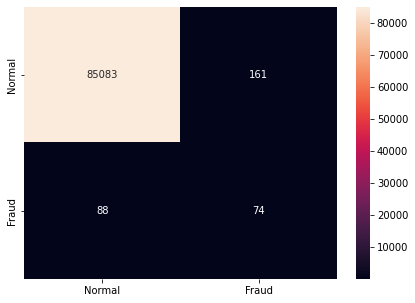

In [ ]:
## classification_report & Confusion Matrix 
labels= ['Normal','Fraud']
cm = confusion_matrix(y_test, ypred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('Normal','Fraud'), columns = ('Normal','Fraud'))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
#print("Test Data Accuracy: %0.4f" % iso_forest.score(x_test,y_test))
print(classification_report(y_test, ypred, target_names=labels))


## Solving the Problem Statement using PyCaret Library(Auto ML)
##### Using SMOTE to fix imbalanced method

In [ ]:
!pip install pycaret

In [5]:
from pycaret.classification import *

In [ ]:
data= df2.drop(['Time','Amount'],axis=1)

In [ ]:
model= setup(data= data, target= 'Class')
compare_models()
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9269,0.8000,0.9032,0.8485,0.8482,0.8498
1,0.9994,0.9262,0.7714,0.8710,0.8182,0.8179,0.8194
2,0.9997,0.9556,0.8286,1.0000,0.9062,0.9061,0.9101
3,0.9996,0.9715,0.8333,0.9677,0.8955,0.8953,0.8979
4,0.9994,0.9422,0.6944,1.0000,0.8197,0.8194,0.8331
5,0.9995,0.9286,0.7500,0.9643,0.8437,0.8435,0.8502
6,0.9997,0.9431,0.8889,0.9697,0.9275,0.9274,0.9283
7,0.9993,0.9414,0.6667,0.9600,0.7869,0.7866,0.7997
8,0.9995,0.9552,0.7714,0.9643,0.8571,0.8569,0.8623


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1502, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1502, verbose=0,
                       warm_start=False)

#### Balancing the class distribution using SMOTE 'oversampling'

In [6]:
from imblearn.over_sampling import SMOTE

In [11]:
X_resample, y_resample = SMOTE().fit_sample(train_scaled, target_df.values.ravel())

In [12]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

## Using Random forest

In [16]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [17]:
y_pred = random_forest.predict(x_test)
random_forest.score(x_test,y_test)

0.9999178962677989

Test Data Accuracy: 0.9999
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85387
       Fraud       1.00      1.00      1.00     85129

    accuracy                           1.00    170516
   macro avg       1.00      1.00      1.00    170516
weighted avg       1.00      1.00      1.00    170516



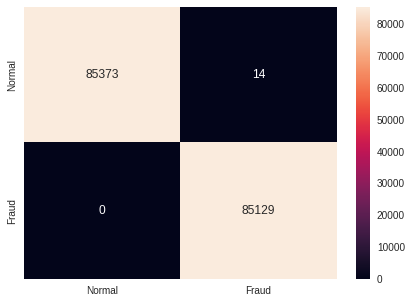

In [18]:
## classification_report & Confusion Matrix 
labels= ['Normal','Fraud']
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('Normal','Fraud'), columns = ('Normal','Fraud'))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % random_forest.score(x_test,y_test))
print(classification_report(y_test, y_pred, target_names=labels))

## Using Neural Network

In [19]:
X_train = np.array(x_train)
X_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
model = Sequential([
    Dense(units=100, input_dim = x_train.shape[1],activation='relu'),   # input of 29 columns as shown above
    Dense(units=50,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dropout(0.2),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
26525/26525 [==============================] - 60s 2ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 2/10
26525/26525 [==============================] - 61s 2ms/step - loss: 0.0095 - accuracy: 0.9979
Epoch 3/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0071 - accuracy: 0.9985
Epoch 4/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 5/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 6/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 7/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0047 - accuracy: 0.9991
Epoch 8/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0044 - accuracy: 0.9992
Epoch 9/10
26525/26525 [==============================] - 58s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 10/10
26525/26525 [==============================

In [34]:
y_pred

array([[0.0000000e+00],
       [9.0714804e-11],
       [1.7616781e-34],
       ...,
       [0.0000000e+00],
       [9.9985814e-01],
       [5.1183824e-24]], dtype=float32)

Test Data Accuracy: 0.9999
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85387
       Fraud       1.00      1.00      1.00     85129

    accuracy                           1.00    170516
   macro avg       1.00      1.00      1.00    170516
weighted avg       1.00      1.00      1.00    170516



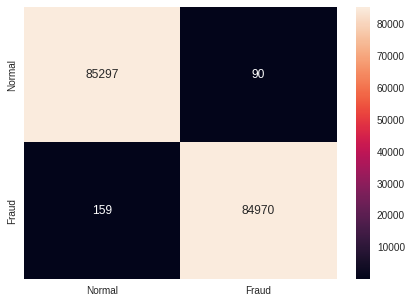

In [35]:
## NN classification_report & Confusion Matrix 
y_pred = model.predict(X_test)
y_pred = np.array(y_pred.round()).reshape(-1,1)
y_test = pd.DataFrame(y_test) 

labels= ['Normal','Fraud']
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('Normal','Fraud'), columns = ('Normal','Fraud'))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % random_forest.score(x_test,y_test))
print(classification_report(y_test, y_pred, target_names=labels))
  

## Summary
We just received an accuray of  99.96% which is atleast 0.01 % higher than most models avalable online. Also, the confusion matrix shows that our model is not overfitted. This number should not be surprising as our data was balanced towards one class. The accuracy in our credit card fraud detection when oversampling with SMOTE is used is 99.99% for both 'random forest' techniqueand NN architecture.

In [ ]:
# More on the topic & techniques used:
https://www.udemy.com/course/learn-python-programming-for-beginners/learn/lecture/29385448#content
    